In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train = pd.read_csv('../../data/train.csv', header=None)
trainLabel = pd.read_csv('../../data/trainLabels.csv', header=None)
test = pd.read_csv('../../data/test.csv', header=None)
print(plt.style.available)
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [38]:
X,y = train,np.ravel(trainLabel)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
a = knn.score(X_test, y_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
tree.predict(X_test)
b = tree.score(X_test,y_test)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
c = model.score(X_test,y_test)

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc.predict(X_test)
d = svc.score(X_test,y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier()
Random_forest.fit(X_train, y_train)
Random_forest.predict(X_test)
e = Random_forest.score(X_test, y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
dict = {}

In [46]:
scores = [a,b,c,d,e]
labels = ['knn','DT','LR','SVC','RF']
for i in range(len(scores)):
    dict[labels[i]] = scores[i]
print(dict)

{'knn': 0.91, 'DT': 0.7666666666666667, 'LR': 0.4638011684748262, 'SVC': 0.92, 'RF': 0.8}


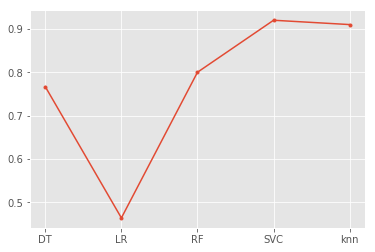

In [47]:
lists = sorted(dict.items()) 
x, y = zip(*lists) 
plt.plot(x, y,marker='.')
plt.show()

In [48]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [49]:
a = svc.predict(test)

In [50]:
submission = pd.DataFrame(svc.predict(test))
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]

In [51]:
submission.to_csv('submission_with_scaling.csv', index=False)